## Import data

In [149]:
import pandas as pd
import seaborn as sn

path_to_file = 'train_titanic.csv'

titanic_data = pd.read_csv(path_to_file, index_col='PassengerId')

# Context

## What is titanic dataset about?

Titanic is a dataset that contains features about people who were on Titanic like age, port in which they were embarked, whether they survived the Titanic catastrophe and etc.

In [150]:
titanic_data.head(15)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


## What is the unique id for each row of data?

Each row of data is identified by a 'PassengerId' column.

## Understanding the meaning of each variable

In [151]:
list(titanic_data.columns.values)

['Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Those are the variables/features that we have

Let's understand the meaning of all features (variables) in the dataset:

???

## Deck plan

Since column 'Cabin' contains values with letters, and letters represent decks on Titanic, I will leave here a plane of Titanic decks.

 ![Titanic Deck plan](titanic_deck_plan.jpg)

# Data quality assessment

## Number of raws and columnms

Let's check how many raws and columns the initial dataset has using shape method

In [152]:
titanic_data_shape = titanic_data.shape
titanic_data_shape

(100000, 11)

In other words, there are 100,000 raws and 11 columns with features (with index it would be 12 columns)

## Types of columns

Let's inspect data types of columns

In [153]:
titanic_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [154]:
titanic_data.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

The dataset has 4 columns with integers, 2 columns with floats and 5 columns with object values.

## Categorizing data

Our features can be divided in 2 groups based on their datatypes:

1. Categorical features. All data that is NOT numerical (in our dataset it's data with an object type).

In [155]:
categorical_columns = list(titanic_data.select_dtypes(include=['object']).columns.values)
categorical_columns

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

There are 5 features with categorical data.


2. Quantitative features. In our dataset it's data with integer and float data types.

In [156]:
quantitative_columns = list(titanic_data.select_dtypes(include=['float64', 'int64']).columns.values)
quantitative_columns

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

There are 6 features with quantitative data.

## Checking for duplicates

In [157]:
titanic_data.duplicated().value_counts()

False    100000
dtype: int64

There is no duplicated data in the dataset.

## Dealing with syntax errors and range constrains

There are certain ranges and logical values which certain variables can have. For example, age cannot be negative, fare cannot be negative and etc.

Let's check those ranges for each variable.

### Pclass

According to the internet, on Titanic there were only 3 classes of cabins: 1st, 2nd and 3rd. Let's check that this is really like this in our dataset.

In [158]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

True, the data is within the range of discrete values.

### Sex

Let's check that sex is within a range of discrete values 'male' or 'female'.

In [159]:
titanic_data.Sex.value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

True, the data is within the range of discrete values.

### Age

Let's check that age is bigger than 0 and less than 122 (130 was chosen because the highest age that a person lived was 122 years)

### SibSp

### Parch

## Dealing with missing data

In [160]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [161]:
count_nan = len(titanic_data) - titanic_data.count()
count_nan

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

Columns 'Sirvived', 'Pclass', 'Sex','SibSp', 'Parch' have no missing values

Let's calculate percentage of missing data in columns that are left.

In [162]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(titanic_data)

There are 5 columns that have missing values.


,Missing Values,% of Total Values
Cabin,67866,67.9
Ticket,4623,4.6
Age,3292,3.3
Embarked,250,0.2
Fare,134,0.1


'Cabin' column contains 67.9% of missing data, so it would be hard to impute there data without changing it significantly. The first thought would be to delete the column completely but as had been stated above Cabin is connected to Deck and Deck might have an assosiation with survival.

Instead, let's replace NaN with 'Not stated' for 'Cabin'.

In [172]:
titanic_data.Cabin = titanic_data.Cabin.fillna('Not stated')

ticket = поступить также как и с cabin

age = среднее по классу каюты и возрасту по полу?

Embarked = мода порта

fare по средней цене в каюте того класса.

## Outlier analysis (boxplots)

Let's find outliers in columns with quantitive categories

<AxesSubplot:>

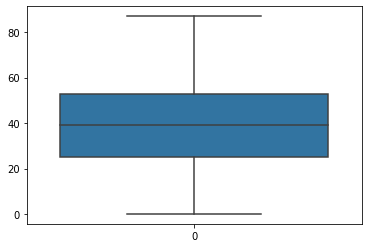

In [164]:
sn.boxplot(data=titanic_data['Age'])

# Data exploration

## Vizualization and summary statistics for each variable

### 'Survived' column

In [165]:
titanic_data.Survived.describe()

count    100000.000000
mean          0.427740
std           0.494753
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Survived, dtype: float64

In [166]:
titanic_data.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

## Assert relationships

посмотреть отдельные калонки зависимость их и выживания
посмотреть у связь выживания только у женщин

взять зависимости из статьи про титаник

# Summary